In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os


## Repetition suppresion

In [3]:
pcn_dir = os.path.join('results', 'recurrent_models')
energies = np.load(os.path.join(pcn_dir, 'energies_evolution.npy'))
energies.shape

(5, 100)

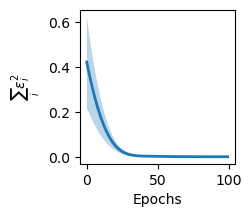

In [4]:
plt.figure(figsize=(2, 2))
plt.plot(energies.mean(axis=0), lw=2)
plt.fill_between(np.arange(energies.shape[1]), energies.mean(axis=0) - energies.std(axis=0), energies.mean(axis=0) + energies.std(axis=0), alpha=0.3)
plt.xlabel('Epochs')
plt.ylabel(r'$\sum_i \varepsilon_i^2$')
# plt.title('Energy evolution')
plt.savefig(os.path.join(pcn_dir, 'energy_evolution.pdf'), bbox_inches='tight')
plt.show()

In [5]:
error_neurons = np.load(os.path.join(pcn_dir, 'error_neurons.npy'))
error_neurons.shape

(3, 4096)

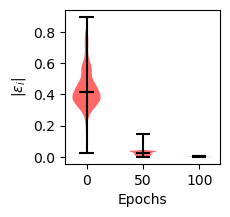

In [6]:
import matplotlib.pyplot as plt

# Create the violin plot
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
colors = plt.cm.viridis(np.linspace(0, 1, 3))
parts = ax.violinplot(error_neurons.T, showmedians=True)

# Set labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel(r'$| \varepsilon_i |$')

for i, body in enumerate(parts['bodies']):
    # body.set_edgecolor('black')
    body.set_facecolor('red')
    body.set_alpha(0.6)  # Set transparency

parts['cmedians'].set_edgecolor('black')  # Set color of medians
parts['cmaxes'].set_edgecolor('black')    # Set color of the max caps
parts['cmins'].set_edgecolor('black')     # Set color of the min caps
parts['cbars'].set_edgecolor('black')

# Set x-axis tick labels
ax.set_xticks(ticks=[1, 2, 3], labels=['0', '50', '100'])
# ax.set_yscale('log')

# Show the plot
plt.savefig(os.path.join(pcn_dir, 'error_neurons.pdf'), bbox_inches='tight')
plt.show()

In [7]:
hpcn_dir = os.path.join('results', 'vanilla_h_models')
energies = np.load(os.path.join(hpcn_dir, 'energies_evolution.npy'))
energies.shape

(5, 100)

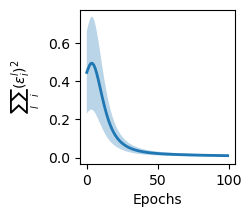

In [8]:
plt.figure(figsize=(2, 2))
plt.plot(energies.mean(axis=0), lw=2)
plt.fill_between(np.arange(energies.shape[1]), energies.mean(axis=0) - energies.std(axis=0), energies.mean(axis=0) + energies.std(axis=0), alpha=0.3)
plt.xlabel('Epochs')
plt.ylabel(r'$\sum_l \sum_i (\varepsilon_i^l)^2$')
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.title('Energy evolution')
plt.savefig(os.path.join(hpcn_dir, 'energy_evolution.pdf'), bbox_inches='tight')
plt.show()

In [9]:
error_neurons = np.load(os.path.join(hpcn_dir, 'error_neurons.npy'))
error_neurons.shape

(3, 4608)

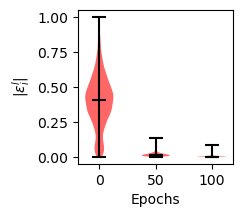

In [10]:
# Create the violin plot
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
colors = plt.cm.viridis(np.linspace(0, 1, 3))
parts = ax.violinplot(error_neurons.T, showmedians=True)

# Set labels and title
ax.set_xlabel('Epochs')
ax.set_ylabel(r'$| \varepsilon_i^l |$')

for i, body in enumerate(parts['bodies']):
    # body.set_edgecolor('black')
    body.set_facecolor('red')
    body.set_alpha(0.6)  # Set transparency
# set color of means

parts['cmedians'].set_edgecolor('black')  # Set color of medians
parts['cmaxes'].set_edgecolor('black')    # Set color of the max caps
parts['cmins'].set_edgecolor('black')     # Set color of the min caps
parts['cbars'].set_edgecolor('black')

# Set x-axis tick labels
ax.set_xticks(ticks=[1, 2, 3], labels=['0', '50', '100'])
# ax.set_yscale('log')

# Show the plot
plt.savefig(os.path.join(hpcn_dir, 'error_neurons.pdf'), bbox_inches='tight')
plt.show()

## Standing's plots

In [11]:
pcn_dir = os.path.join('results', 'recurrent_models')
if not os.path.exists(pcn_dir):
    os.makedirs(pcn_dir)

pcn_gaussian_uncor = np.load(os.path.join(pcn_dir, 'PCN_error_probs_gaussian_b_0.npy'))
pcn_gaussian_cor = np.load(os.path.join(pcn_dir, 'PCN_error_probs_gaussian_b_04.npy'))
pcn_tinyimagenet = np.load(os.path.join(pcn_dir, 'PCN_error_probs_tinyimagenet_b_0.npy'))
# pcn_large_tinyimagenet = np.load(os.path.join(pcn_dir, 'PCN_error_probs_large_tinyimagenet_b_0.npy'))
# pcn_tinyimagenet[-2:] = pcn_large_tinyimagenet

hn_dir = os.path.join('results', 'hopfield')
HN_gaussian_uncor = np.load(os.path.join(hn_dir, 'HN_error_probs_gaussian_b_0.npy'))
HN_gaussian_cor = np.load(os.path.join(hn_dir, 'HN_error_probs_gaussian_b_04.npy'))
HN_tinyimagenet = np.load(os.path.join(hn_dir, 'HN_error_probs_tinyimagenet_b_0.npy'))

MCHN_gaussian_uncor = np.load(os.path.join(hn_dir, 'MCHN_error_probs_gaussian_b_0.npy'))
MCHN_gaussian_cor = np.load(os.path.join(hn_dir, 'MCHN_error_probs_gaussian_b_04.npy'))
MCHN_tinyimagenet = np.load(os.path.join(hn_dir, 'MCHN_error_probs_tinyimagenet_b_0.npy'))

# load results for autoencoder and vae
autoencoders_dir = os.path.join('results','autoencoders')
ae_means_gaussian_b_0 = np.load(os.path.join(autoencoders_dir, 'means_gaussian_b_0.npz'))
ae_std_gaussian_b_0 = np.load(os.path.join(autoencoders_dir, 'stds_gaussian_b_0.npz'))
ae_gaussian_uncor = 1 - ae_means_gaussian_b_0['ae_means'] # error is 1 - accuracy
vae_gaussian_uncor = 1 - ae_means_gaussian_b_0['vae_means']
ae_gaussian_uncor_std = ae_std_gaussian_b_0['ae_stds']
vae_gaussian_uncor_std = ae_std_gaussian_b_0['vae_stds']

ae_means_gaussian_b_04 = np.load(os.path.join(autoencoders_dir, 'means_gaussian_b_04.npz'))
ae_std_gaussian_b_04 = np.load(os.path.join(autoencoders_dir, 'stds_gaussian_b_04.npz'))
ae_gaussian_cor = 1 - ae_means_gaussian_b_04['ae_means']
vae_gaussian_cor = 1 - ae_means_gaussian_b_04['vae_means']
ae_gaussian_cor_std = ae_std_gaussian_b_04['ae_stds']
vae_gaussian_cor_std = ae_std_gaussian_b_04['vae_stds']

ae_means_tinyimagenet = np.load(os.path.join(autoencoders_dir, 'means_tinyimagenet.npz'))
ae_std_tinyimagenet = np.load(os.path.join(autoencoders_dir, 'stds_tinyimagenet.npz'))
ae_tinyimagenet = 1 - ae_means_tinyimagenet['ae_means']
vae_tinyimagenet = 1 - ae_means_tinyimagenet['vae_means']
ae_tinyimagenet_std = ae_std_tinyimagenet['ae_stds']
vae_tinyimagenet_std = ae_std_tinyimagenet['vae_stds']


# ae_stds_gaussian_b_0 = np.load(os.path.join(autoencoders_dir, 'stds_gaussian_b_0.npz'))


# ae_means_gaussian_b_04 = np.load(os.path.join(autoencoders_dir, 'means_gaussian_b_04.npz'))
# ae_stds_gaussian_b_04 = np.load(os.path.join(autoencoders_dir, 'stds_gaussian_b_04.npz'))

# ae_means_tinyimagenet = np.load(os.path.join(autoencoders_dir, 'means_tinyimagenet.npz'))
# ae_stds_tinyimagenet = np.load(os.path.join(autoencoders_dir, 'stds_tinyimagenet.npz'))

In [9]:
pcn_tinyimagenet, ae_gaussian_uncor

(array([[0.     , 0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     , 0.     ],
        [0.     , 0.     , 0.     , 0.     , 0.005  ],
        [0.     , 0.     , 0.     , 0.0025 , 0.     ],
        [0.009  , 0.004  , 0.009  , 0.008  , 0.007  ],
        [0.1895 , 0.18875, 0.19075, 0.192  , 0.19725],
        [0.3755 , 0.3779 , 0.3721 , 0.3756 , 0.3836 ]]),
 array([0.     , 0.     , 0.     , 0.     , 0.     , 0.0002 , 0.00605,
        0.0614 ]))

[   20    40   100   200   400  1000  4000 10000]


C:\Users\yanch\AppData\Local\Temp\ipykernel_33040\4168575819.py:171: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


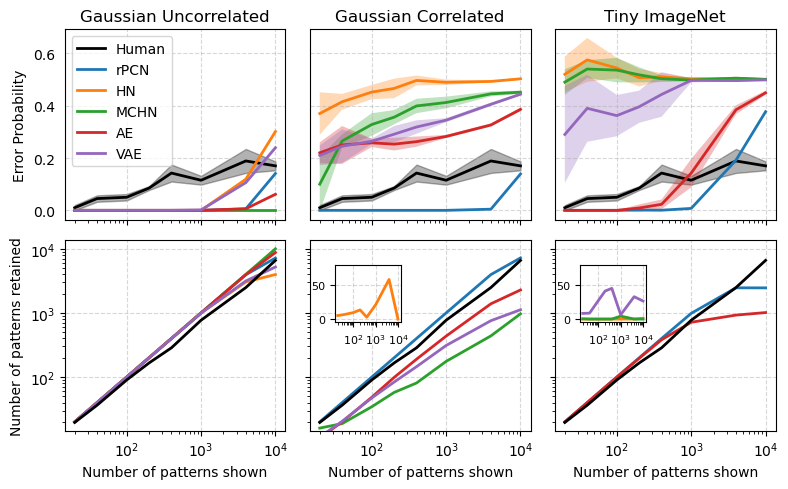

In [33]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sample_sizes = [20, 40, 100, 200, 400, 1000, 4000, 10000]
# x = np.log10(np.array(sample_sizes))
x = np.array(sample_sizes)
print(x)
lw = 2
alpha = 0.3
def plot_one_ax(ax, pcn, hn, mchn, ae, vae, ae_std, vae_std, title):
    ax.plot(x, pcn.mean(axis=1), lw=lw, label='rPCN')
    ax.fill_between(
        x, 
        pcn.mean(axis=1) - pcn.std(axis=1), 
        pcn.mean(axis=1) + pcn.std(axis=1), 
        alpha=alpha
    )
    ax.plot(x, hn.mean(axis=1), lw=lw, label='HN')
    ax.fill_between(
        x, 
        hn.mean(axis=1) - hn.std(axis=1), 
        hn.mean(axis=1) + hn.std(axis=1), 
        alpha=alpha
    )
    ax.plot(x, mchn.mean(axis=1), lw=lw, label='MCHN')
    ax.fill_between(
        x, 
        mchn.mean(axis=1) - mchn.std(axis=1), 
        mchn.mean(axis=1) + mchn.std(axis=1), 
        alpha=alpha
    )
    ax.plot(x, ae, lw=lw, label='AE')
    ax.fill_between(
        x, 
        ae - ae_std, 
        ae + ae_std, 
        alpha=alpha
    )
    ax.plot(x, vae, lw=lw, label='VAE')
    ax.fill_between(
        x, 
        vae - vae_std, 
        vae + vae_std, 
        alpha=alpha
    )
    ax.set_title(title)
    ax.yaxis.set_ticks_position('none')

test_trials = [20, 40, 80, 80, 80, 80, 160, 160]
mean_errors = [0.2, 1.8, 4.0, 6.8, 11.4, 9.2, 30.2, 27.2]
std = [0.45, 1.1, 2.2, 1.3, 5.8, 3.0, 16.4, 6.1]
std = [a/b for a, b in zip(std, test_trials)]/np.sqrt(5) # 5 is the number subjects for normal picture in table 1 of Standing (1973)
human_error_probs = [a/b for a, b in zip(mean_errors, test_trials)]

def get_retain(error_probs, averaging=True):
    if averaging:
        retain = sample_sizes - 2 * (error_probs.mean(axis=1) * sample_sizes)
    else:
        retain = sample_sizes - 2 * (error_probs * sample_sizes)
    # Replace negative values with 0 using where
    retain = np.where(retain < 0, 0, retain)
    return retain

HN_retained_uncor = get_retain(HN_gaussian_uncor)
HN_retained_cor = get_retain(HN_gaussian_cor)
HN_retained_tinyimagenet = get_retain(HN_tinyimagenet)

MCHN_retained_uncor = get_retain(MCHN_gaussian_uncor)
MCHN_retained_cor = get_retain(MCHN_gaussian_cor)
MCHN_retained_tinyimagenet = get_retain(MCHN_tinyimagenet)

PCN_retained_uncor = get_retain(pcn_gaussian_uncor)
PCN_retained_cor = get_retain(pcn_gaussian_cor)
PCN_retained_tinyimagenet = get_retain(pcn_tinyimagenet)

ae_retained_uncor = get_retain(ae_gaussian_uncor, averaging=False)
ae_retained_cor = get_retain(ae_gaussian_cor, averaging=False)
ae_retained_tinyimagenet = get_retain(ae_tinyimagenet, averaging=False)

vae_retained_uncor = get_retain(vae_gaussian_uncor, averaging=False)
vae_retained_cor = get_retain(vae_gaussian_cor, averaging=False)
vae_retained_tinyimagenet = get_retain(vae_tinyimagenet, averaging=False)

experimental_retained = [19.6, 36.4, 90, 166, 286, 770, 2490, 6600]
   
fig, ax = plt.subplots(2, 3, figsize=(8, 5), sharex='col', sharey='row')
for a in ax[0]:
    a.plot(x, human_error_probs, lw=lw, label='Human', color='k')
    a.fill_between(
        x, 
        np.array(human_error_probs) - np.array(std), 
        np.array(human_error_probs) + np.array(std), 
        alpha=alpha,
        color='k'
    )
    if a == ax[0,0]:
        a.set_ylabel('Error Probability')

plot_one_ax(ax[0,0], pcn_gaussian_uncor, HN_gaussian_uncor, MCHN_gaussian_uncor, ae_gaussian_uncor, vae_gaussian_uncor, ae_gaussian_uncor_std, vae_gaussian_uncor_std, 'Gaussian Uncorrelated')
plot_one_ax(ax[0,1], pcn_gaussian_cor, HN_gaussian_cor, MCHN_gaussian_cor, ae_gaussian_cor, vae_gaussian_cor, ae_gaussian_cor_std, vae_gaussian_cor_std, 'Gaussian Correlated')
plot_one_ax(ax[0,2], pcn_tinyimagenet, HN_tinyimagenet, MCHN_tinyimagenet, ae_tinyimagenet, vae_tinyimagenet, ae_tinyimagenet_std, vae_tinyimagenet_std, 'Tiny ImageNet')



ax[1,0].loglog(sample_sizes, PCN_retained_uncor, lw=lw, label='PCN')
ax[1,0].loglog(sample_sizes, HN_retained_uncor, lw=lw, label='HN')
ax[1,0].loglog(sample_sizes, MCHN_retained_uncor, lw=lw, label='MCHN')
ax[1,0].loglog(sample_sizes, ae_retained_uncor, lw=lw, label='AE')
ax[1,0].loglog(sample_sizes, vae_retained_uncor, lw=lw, label='VAE')
ax[1,0].loglog(sample_sizes, experimental_retained, lw=lw, color='k')
ax[1,0].set_ylabel('Number of patterns retained')
ax[1,0].set_xlabel('Number of patterns shown')
# ax[1,0].set_ylim(10, 10000)

ax[1,1].loglog(sample_sizes, PCN_retained_cor, lw=lw, label='PCN')
ax[1,1].loglog(sample_sizes, HN_retained_cor, lw=lw, label='HN', alpha=0)
ax[1,1].loglog(sample_sizes, MCHN_retained_cor, lw=lw, label='MCHN')
ax[1,1].loglog(sample_sizes, ae_retained_cor, lw=lw, label='AE')
ax[1,1].loglog(sample_sizes, vae_retained_cor, lw=lw, label='VAE')
ax[1,1].loglog(sample_sizes, experimental_retained, lw=lw, color='k')
ax[1,1].set_xlabel('Number of patterns shown')

ax[1,2].loglog(sample_sizes, PCN_retained_tinyimagenet, lw=lw, label='PCN')
# ax[1,2].loglog(sample_sizes, HN_retained_tinyimagenet, lw=lw, label='HN', alpha=0)
# ax[1,2].loglog(sample_sizes, MCHN_retained_tinyimagenet, lw=lw, label='MCHN',alpha=0)
ax[1,2].loglog(sample_sizes, ae_retained_tinyimagenet, lw=lw, label='AE', color='C3')
# ax[1,2].loglog(sample_sizes, vae_retained_tinyimagenet, lw=lw, label='VAE',alpha=0)
ax[1,2].loglog(sample_sizes, experimental_retained, lw=lw, color='k')
ax[1,2].set_xlabel('Number of patterns shown')

# Create Insets for ax[1,1] and ax[1,2]
# Inset for ax[1,1]: HN_retained_cor
inset1 = inset_axes(ax[1,1], width="30%", height="30%", loc='upper left', borderpad=1.8)
inset1.plot(sample_sizes, HN_retained_cor, lw=lw, label='HN', color='C1')  # Choose a distinct color
inset1.set_xscale('log')  # Keep x-axis consistent
inset1.set_yscale('linear')  # Linear y-axis
# inset1.set_title('HN Retained (Linear)', fontsize=8)
inset1.tick_params(axis='both', which='major', labelsize=8)
inset1.grid(True, linestyle='--', alpha=0.5)
inset1.set_ylim(-5, 80) 

# Inset for ax[1,2]: HN_retained_tinyimagenet and MCHN_retained_tinyimagenet
inset2 = inset_axes(ax[1,2], width="30%", height="30%", loc='upper left', borderpad=1.8)
inset2.plot(sample_sizes, HN_retained_tinyimagenet, lw=lw, label='HN', color='C1')
inset2.plot(sample_sizes, MCHN_retained_tinyimagenet, lw=lw, label='MCHN', color='C2')
inset2.plot(sample_sizes, vae_retained_tinyimagenet, lw=lw, label='VAE', color='C4')
inset2.set_xscale('log')

# inset2.set_yscale('linear')
inset2.tick_params(axis='both', which='major', labelsize=8)
inset2.grid(True, linestyle='--', alpha=0.5)
inset2.set_ylim(-5, 80)
# inset2.legend(fontsize=6, loc='upper right')

# # move insets slightly up to avoid overlap with curves
# pos1 = inset1.get_position()
# print(f'pos1: {pos1}')
# delta_y = 0.2  # Adjust this value as needed
# new_pos1 = [pos1.x0, pos1.y0 + delta_y, pos1.width, pos1.height+ delta_y]
# inset1.set_position(new_pos1)
# pos2 = inset2.get_position()
# new_pos2 = [pos2.x0, pos2.y0 + delta_y, pos2.width, pos2.height+ delta_y]
# inset2.set_position(new_pos2)


for a in ax.flatten():
    a.set_xscale('log')
    a.grid(True, linestyle='--', alpha=0.5)
    if a == ax[0,0]:
        a.legend()

fig.tight_layout()
os.makedirs('results/imgs', exist_ok=True)
plt.savefig('results/imgs/comparison.pdf')
plt.show()

In [17]:
print(ae_retained_cor)

[  11.2   20.    48.4   98.8  190.   435.2 1389.6 2282.4]


Performances for different batch sizes

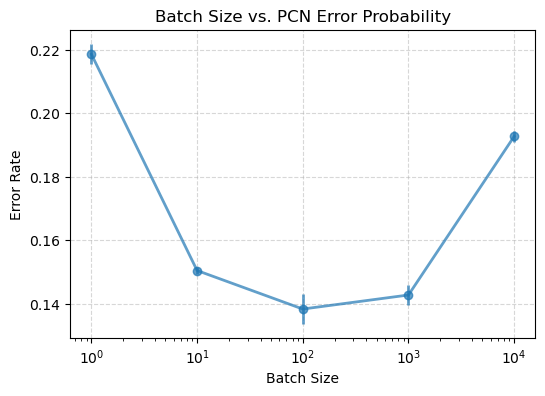

In [6]:
# run batch_sizes.py for the data

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

pcn_dir = os.path.join('results', 'recurrent_models')
if not os.path.exists(pcn_dir):
    os.makedirs(pcn_dir)

batch_sizes = np.load(os.path.join(pcn_dir, 'batch_sizes.npy'))
PCN_error_probs = np.load(os.path.join(pcn_dir, 'batch_size_error_probs.npy'))

mean_error_probs = PCN_error_probs.mean(axis=1)
std_error_probs = PCN_error_probs.std(axis=1)

fig, ax = plt.subplots(figsize=(6, 4))
ax.errorbar(batch_sizes, mean_error_probs, yerr=std_error_probs, fmt='-o', lw=2, alpha=0.7)
ax.set_xlabel('Batch Size')
ax.set_xscale('log')
ax.set_ylabel('Error Rate')
ax.set_title('Batch Size vs. rPCN Error Probability')
ax.grid(True, linestyle='--', alpha=0.5)

# # Create an inset plot
# inset = inset_axes(ax, width="30%", height="30%", loc='upper right', borderpad=1.8)
# inset.errorbar(batch_sizes, mean_error_probs, yerr=std_error_probs, fmt='-o', lw=2, alpha=0.7)
# inset.set_xscale('log')
# inset.set_yscale('linear')
# inset.tick_params(axis='both', which='major', labelsize=8)
# inset.grid(True, linestyle='--', alpha=0.5)

plt.savefig(
    os.path.join(pcn_dir, 'batch_size_vs_PCN_error_probs.pdf'),
    format='pdf', dpi=300, bbox_inches='tight'
)
plt.show()

## recurrent PCN capacity

For uncorrelated data

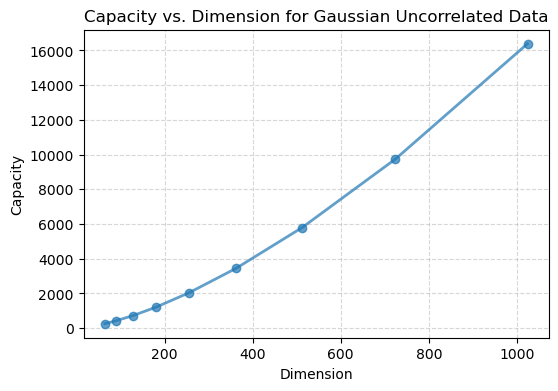

In [37]:
pcn_dir = os.path.join('results', 'recurrent_models')
if not os.path.exists(pcn_dir):
    os.makedirs(pcn_dir)

# Read dimensions and capacities from running capacities.py
uncor_dimensions = np.load(
    os.path.join(
        pcn_dir,
        f'dimensions_gaussian_b_0.npy'
    )
)
uncor_capacities = np.load(
    os.path.join(
        pcn_dir,
        f'capacities_gaussian_b_0.npy'
    )
)

# Plot loaded dimensions vs. capacities
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(uncor_dimensions, uncor_capacities, '-o', lw=2, alpha=0.7)
ax.set_xlabel("Dimension")
ax.set_ylabel("Capacity")
ax.set_title("Capacity vs. Dimension for Gaussian Uncorrelated Data")
ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig(
    os.path.join(
        pcn_dir,
        f'capacity_vs_dimension_gaussian_b_0.pdf'
    ),
    format='pdf', bbox_inches='tight'
)
plt.show()


## Hierarchical models

In [33]:
save_path = os.path.join('results', 'hierarchical_models')
if not os.path.exists(save_path):
    os.makedirs(save_path)

base_class = [4]; test_class = [1] # set to [4] and [5] to replicate Fig.7, can be set to other classes, too

# alternative values for figures in supplementary material
# base_class = [4]; test_class = [9]
# base_class = [4]; test_class = [1]
# base_class = [3,4,8]; test_class = [5]
# base_class = [2,3,4,5,6,7,8,9,0]; test_class = [1]

is_fully_connected = False # set to False for locally connected hPCN

# Reconstruct the folder name and path using the parameters
if is_fully_connected:
    folder_name = f"base_{'_'.join(map(str, base_class))}_test_{'_'.join(map(str, test_class))}_fully_connected"
else:
    folder_name = f"base_{'_'.join(map(str, base_class))}_test_{'_'.join(map(str, test_class))}"

save_path = os.path.join(save_path, folder_name)

# Check if the folder exists and read from it
if not os.path.exists(save_path):
    print(f"Folder {save_path} does not exist.")


In [34]:
energy = np.load(os.path.join(save_path, 'energy.npz'))
e_fam = energy['energy_fam']
e_nov = energy['energy_nov']
e_test_nov = energy['energy_test_nov']
e_fam.shape

(100, 3)

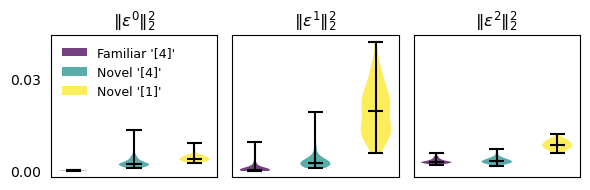

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(6, 2), sharey=True)
colors = plt.cm.viridis(np.linspace(0, 1, 3))
for l in range(3):
    data = [e_fam[:, 2-l], e_nov[:, 2-l], e_test_nov[:, 2-l]]
    parts = ax[l].violinplot(data, showmeans=False, showmedians=True)
    # Coloring each violin plot
    for i, body in enumerate(parts['bodies']):
        body.set_facecolor(colors[i])
        # body.set_edgecolor('black')
        body.set_alpha(0.75)  # Set transparency

    # Set color for the other components: medians, caps, etc.
    parts['cmedians'].set_edgecolor('black')  # Set color of medians
    parts['cmaxes'].set_edgecolor('black')    # Set color of the max caps
    parts['cmins'].set_edgecolor('black')     # Set color of the min caps
    parts['cbars'].set_edgecolor('black')

    if l == 0:
        ax[l].legend([f"Familiar '{base_class}'", f"Novel '{base_class}'", f"Novel '{test_class}'"], loc='upper left', fontsize=9, frameon=False)

    ax[l].set_title(rf'$\Vert \varepsilon^{l} \Vert_2^2$')
    
    ax[l].set_xticks([])
    ax[l].yaxis.set_ticks_position('none') 
    ax[l].tick_params(axis='y', labelsize=10)

    # Set y tick labels
    ax[l].set_yticks([0, 0.03])

plt.tight_layout()
plt.savefig(save_path + '/energy_distribution.pdf', format = 'pdf' , bbox_inches='tight')
plt.show()

In [36]:
separability = np.load(os.path.join(save_path, 'separability.npz'))
sep_12 = separability['separability_12']
sep_23 = separability['separability_23']
print(sep_12.shape)
sep_23

(5, 3)


array([[3.90222504, 3.27536478, 4.31264762],
       [4.13618638, 2.85577788, 2.8810564 ],
       [4.2624128 , 2.52529658, 3.74073762],
       [3.78774219, 2.89479091, 3.16399471],
       [4.69073846, 3.15516886, 4.82099504]])

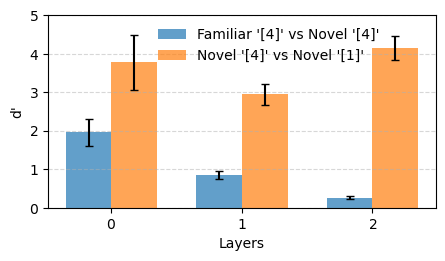

In [39]:
plt.figure(figsize=(5, 2.5))
# plt.title(f"d' separability between classes of digits by layers")

avg12 = np.mean(sep_12, axis=0)[::-1]
std12 = np.std(sep_12, axis=0)[::-1]
avg23 = np.mean(sep_23, axis=0)[::-1]
std23 = np.std(sep_23, axis=0)[::-1]

# x-axis locations for the groups
layers = np.arange(3)

# Width of the bars
bar_width = 0.35

# Plotting the bars
# plt.bar(layers - bar_width / 2, avg12, bar_width, yerr=yerr12,
#         label=f'sep. between familiar {base_class} and novel {base_class}', capsize=5)
# plt.bar(layers + bar_width / 2, avg23, bar_width, yerr=yerr23,
#         label=f'sep. between novel {base_class} and novel {test_class}', capsize=5)
plt.bar(layers - bar_width / 2, avg12, bar_width, yerr=std12,
        label=f"Familiar '{base_class}' vs Novel '{base_class}'", capsize=3, alpha=0.7)
plt.bar(layers + bar_width / 2, avg23, bar_width, yerr=std23,
        label=f"Novel '{base_class}' vs Novel '{test_class}'", capsize=3, alpha=0.7)

plt.ylabel("d'")
plt.xlabel('Layers')
plt.xticks(layers, [f'${i}$' for i in range(3)])
# set the y-axis limits for uniform comparison across trials
plt.ylim(0, 5)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='upper center', bbox_to_anchor=(0.57, 1), frameon=False)
plt.savefig(save_path + '/separability_by_layers.pdf', bbox_inches='tight')
# plt.show()